In [4]:
from Tkinter import *
from PIL import ImageTk, Image
import math
import matplotlib.patches as patches
from spot2intensity import Collection
import pandas as pd
from data_180218 import c_data, load_data, BLOCK_SHAPE
import numpy as np
from spot2intensity import Point

In [5]:
COLLECTIONS = load_data()

In [6]:
COLLECTIONS["slide_21"].create_grid(BLOCK_SHAPE)

AttributeError: 'str' object has no attribute 'x'

In [4]:
COLLECTIONS["slide_21"].grids[0].rectangle.corners_as_points

[Point(55,132), Point(61,3460), Point(997,3460), Point(994,136)]

In [5]:
data_dict = c_data(28)
fpath =data_dict["tif_a_path"]
print(fpath)
images = Collection.read_tif(fpath)
image = images[1]
im_array = np.asarray(image)
im_array = im_array * (255.0/im_array.max())
img = Image.fromarray(im_array)

data/2018-02-18_microarray/slide_28/afterIncubation/28_80_600_rot.tif


In [6]:
event2canvas = lambda e, c: (c.canvasx(e.x), c.canvasy(e.y))

root = Toplevel()

#setting up a tkinter canvas with scrollbars
frame = Frame(root, bd=2, relief=SUNKEN)
frame.grid_rowconfigure(0, weight=1)
frame.grid_columnconfigure(0, weight=1)
xscroll = Scrollbar(frame, orient=HORIZONTAL)
xscroll.grid(row=1, column=0, sticky=E+W)
yscroll = Scrollbar(frame)
yscroll.grid(row=0, column=1, sticky=N+S)
canvas = Canvas(frame, bd=0, xscrollcommand=xscroll.set, yscrollcommand=yscroll.set)
canvas.grid(row=0, column=0, sticky=N+S+E+W)
xscroll.config(command=canvas.xview)
yscroll.config(command=canvas.yview)
frame.pack(fill=BOTH,expand=1)
img = ImageTk.PhotoImage(img)
canvas.create_image(0,0,image=img,anchor="nw")
canvas.config(scrollregion=canvas.bbox(ALL))
#function to be called when mouse is clicked
grid =[]
def printcoords(event):
        # outputting x and y coords to console
        cx, cy = event2canvas(event, canvas)
        grid.append(Point(cx, cy))
        print ("Point(%d, %d)" % (cx, cy))
#mouseclick event

canvas.bind("<ButtonPress-1>",printcoords)

root.mainloop()

In [7]:
grid

[]

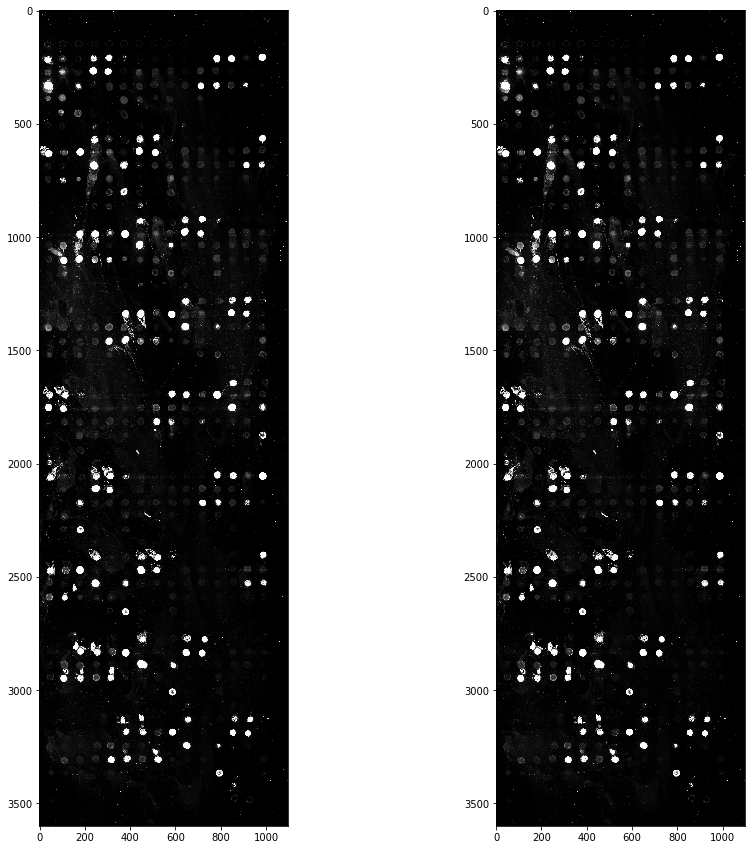

In [8]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(ncols=2, figsize=(15,15))

axes[0].imshow(np.asarray(image),cmap="gray")
axes[1].imshow(im_array,cmap="gray")

plt.show()